This is Troy Ferguson's Jupyter Notebook for Index Replication. (Nevermind- ignore this file. 

In [25]:
#Will need to import these modules. 
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [26]:
#Below is user defined parameters
Use1file1= 'C:/PATH/dow_jones_historical_prices.csv'
n= 3
index = '.DJI'

In [27]:
my_data = pd.read_csv(Use1file1, index_col = 'Date')
#Assigning Variable to itself to surpress output
#I have to rename column headers because I will be undsure of the exact strings used in the csv uploaded to the program
#In both the prompt and examples, the strings were different.
my_data = my_data.rename(index={0: "Date", 1: "Symbol", 2: "Close"})

Coeffcient of Variations is standard dev/ mean. It is one of the most accepted statistical measures for comparing samples with different means. It also has the added effect of normalizing means making values of different scales easy to compare. 

In [4]:
#Group by similar symbols so that I can compare averages
symbols = my_data.groupby('Symbol')
jim2 = symbols.agg({"Close": [np.mean, np.std]})
jim= jim2['Close']
#Coefficeint of varations- CoeffVar.
#See attached document for why I chose volatility.
jim['CoeffVar']= (jim['std']/jim['mean'])*100
#I am going to subract each Coeffvar against the index's coeffvar. I am trying to minimize the difference in volatilities.
#The lower the DiffofIndex (The difference between volatility of index and the stock) the higher the probability 
#the stocks fluctuate together.
Rank_Value = jim.get_value(index, 'CoeffVar')
jim['DiffofIndex']= (jim['CoeffVar']-Rank_Value)
#Sorting them will allow me to rank order which stocks have closest volatility to index. 
jim = jim.sort_values(by='DiffofIndex', ascending=True)

In [5]:
jim

,mean,std,CoeffVar,DiffofIndex
Symbol,,,,
.DJI,26342.181692,589.503442,2.237869,0.000000
VZ,57.671846,1.452157,2.517965,0.280096
CVX,121.399000,3.172692,2.613442,0.375573
NKE,84.835846,2.879376,3.394056,1.156187
JNJ,135.235923,4.607931,3.407328,1.169459
UTX,131.981462,4.642197,3.517310,1.279441
MRK,82.150692,2.912106,3.544834,1.306965
TRV,145.721308,5.418867,3.718651,1.480782
IBM,139.324385,5.313612,3.813842,1.575973


In [6]:
#Dropping the index before we rank order is ideal as we don't want to rank DJI as 1 since it is our benchmark
jim = jim.drop(index)
#Below is the script for rank ordering. In this case I need to generate 30 rows. I need a way of generating rank ordered numbers
#that is not index dependent, since the given CSV may be the S&P500 or another, different numbered index. 
total_rows = jim.shape[0] + 1
jim["RankOrd"] = range(1,total_rows)
jim["RankOrd"] = range(1,total_rows)
jim
#The first stock, VZ has a adjusted volatility very similar to the index itself.

,mean,std,CoeffVar,DiffofIndex,RankOrd
Symbol,,,,,
VZ,57.671846,1.452157,2.517965,0.280096,1
CVX,121.399000,3.172692,2.613442,0.375573,2
NKE,84.835846,2.879376,3.394056,1.156187,3
JNJ,135.235923,4.607931,3.407328,1.169459,4
UTX,131.981462,4.642197,3.517310,1.279441,5
MRK,82.150692,2.912106,3.544834,1.306965,6
TRV,145.721308,5.418867,3.718651,1.480782,7
IBM,139.324385,5.313612,3.813842,1.575973,8
JPM,110.993231,4.666955,4.204721,1.966852,9


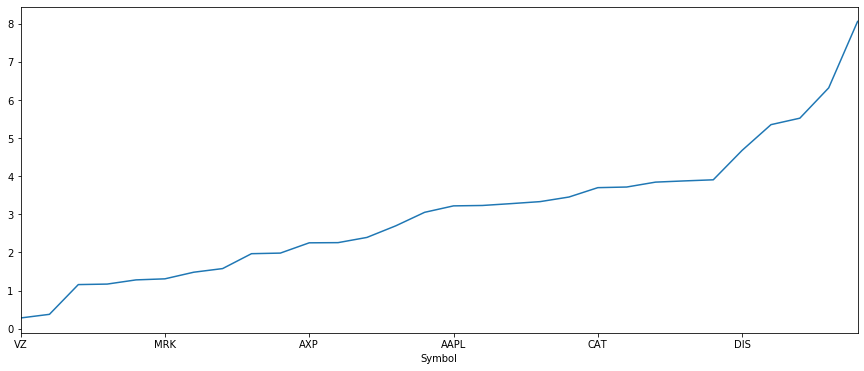

In [7]:
# For this index, the deviations of volatilities of underlying shares from the index's are linear. For the S&P we might see
# an exponential curve. A five nummber summary seem appropriate.
(jim['DiffofIndex']).plot(figsize = (15, 6));
plt.show()

In [8]:
#We will take the top n securities as the data to be used in the regression
data_top = jim.iloc[0:n]
# This grabs the tickers that we will seperate from the long list
tickers = list(data_top.index)
#We will need to add the index(.DJI) so we can grab its data with all the other data in one move. 
tickers.append(index)

In [9]:
#This collects the index plus top n tickers
my_new_data = my_data[my_data['Symbol'].isin(tickers)]
#Have to reset index for .pivot to work
my_new_data = my_new_data.reset_index()
#.pivot will generate the data into a form that works best with regression analysis.
final = my_new_data.pivot(index='Date', columns='Symbol', values='Close')
final

Symbol,.DJI,CVX,NKE,VZ
Date,,,,
2019-03-20,25745.67,124.69,86.69,57.67
2019-03-21,25962.51,125.86,88.01,58.29
2019-03-22,25502.32,123.09,82.19,59.76
2019-03-25,25516.83,122.89,82.33,60.08
2019-03-26,25657.73,124.13,83.38,60.63
...,...,...,...,...
2019-09-23,26949.99,124.90,87.69,60.21
2019-09-24,26807.77,123.74,87.18,60.51
2019-09-25,26970.71,123.51,90.81,60.27


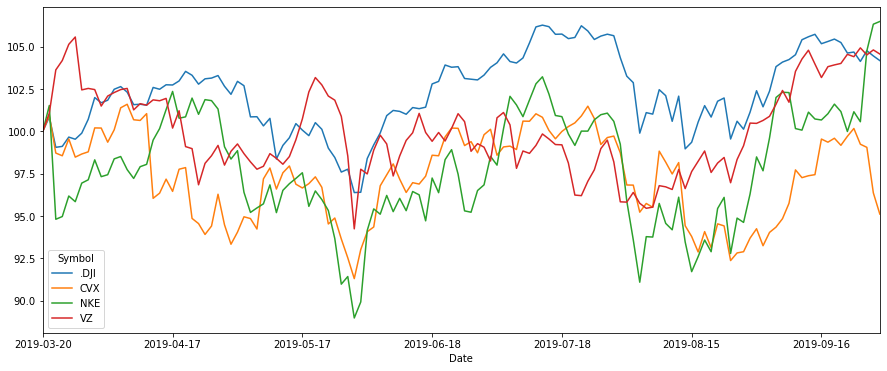

In [10]:
#Compares securities with index
(final / final.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

All of the securities will trend under the DJI. that is because we used it as a bench mark. The key thing here is that all the securtities appear to move with the DJI and could average out to a line that mimics the DJI.

In [11]:
#We will now start to calculate returns that we will use in the regression
#Variable below produces a data table that calculates simple retunrs
returns = (final / final.shift(1)) - 1
#The below function calls a method named resent and index. these functions have nothing to do with variable index
returns1 = returns.reset_index()
#Below allows me to drop the first line which is NaN beause each cell is calcualted from a prior timestep. 
returns1 = returns1.drop(returns1.index[0])
#I am taking the ticker's names below so I can use them as the regressors for the regression
New_tickers= list(returns1.columns) 

In [12]:
#I have to remove these becuase I am seperating x variables from y variables.
New_tickers.remove('Date')
New_tickers.remove(index)

In [13]:
#Set up the regression model- OLS
X = returns1[New_tickers]
Y = returns1[index]
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   .DJI   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     71.48
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           5.50e-27
Time:                        00:01:09   Log-Likelihood:                 499.89
No. Observations:                 129   AIC:                            -991.8
Df Residuals:                     125   BIC:                            -980.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.353      0.725      -0.001       0.001
CVX            0.1706      0.040      4.253      0.000       0.091       0.250
NKE            0.3358      0.031     10.871      0.000       0.275       0.397
VZ             0.1018      0.041      2.462      0.015       0.020       0.184
==============================================================================
Omnibus:                       19.143   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.125
Skew:                          -0.796   Prob(JB):                     2.12e-06
Kurtosis:                       4.526   Cond. No.                         98.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Grab the correlation values of the tickers
fun123 = reg.params
#Dropping the first row since it is the constant.
fun123= fun123.iloc[1:]
#That expression is all the correlation not covered in the regresion
j = 1 - fun123.sum(axis = 0, skipna = True) 
#q is how many regressors there are
q = len(fun123)
#j is what remains that cannot be explained by the regressors (I.e. not capatured in the model)
#for purposes here, we have to assume it is random and distributed evenly against all parameters.
#q allows me to split up evenly what is not captured by my model
m = j/q
#I will add m to every correlation coeffecient evenly. 
m

0.13059077799904553

In [15]:
fun123

CVX    0.170644
NKE    0.335831
VZ     0.101752
dtype: float64

In [16]:
#Want to work with these coefficients in a dataframe so I can print them to a csv easily
z = fun123.to_frame()
# Current Index will be too problematic to label
z = z.reset_index()
#This is to label the Symbols to help with CSV presentation
z.columns = ['Symbol','Coefficient']
#This generates the Weights column that scales what each allocation should be, totaling 100%
z['Weight']= (z.iloc[:,1] + m)
#Want to drop the coeffecients column
z= z.drop(z.columns[1],axis=1)
z= z.set_index('Symbol')
#Prints the desired csv with the correct format
z.to_csv('approximation.csv')

In [17]:
#This is how much we should invest in each security to make a sparse index that will track the DJI
z

,Weight
Symbol,
CVX,0.301235
NKE,0.466422
VZ,0.232343


In [18]:
#The weights all add up to 1
z.sum()

Weight    1.0
dtype: float64

In [19]:
###Show Graphically how my portfolio compares
Portfolio= final
Portfolio1= pd.DataFrame()
Portfolio1[index]= final.iloc[:,0] 
Portfolio1['CVX'] = (final['CVX'] * z.iloc[0,0])
Portfolio1['NKE'] = (final['NKE'] * z.iloc[1,0])
Portfolio1['VZ'] = (final['VZ'] * z.iloc[2,0])

In [20]:
Portfolio1['Sum wts'] = (final['CVX'] + final['NKE'] + final['VZ'])

In [22]:
Portfolio2= Portfolio1.drop(['CVX', 'VZ', 'NKE'], axis=1)
Portfolio2

,.DJI,Sum wts
Date,,
2019-03-20,25745.67,269.05
2019-03-21,25962.51,272.16
2019-03-22,25502.32,265.04
2019-03-25,25516.83,265.30
2019-03-26,25657.73,268.14
...,...,...
2019-09-23,26949.99,272.80
2019-09-24,26807.77,271.43
2019-09-25,26970.71,274.59


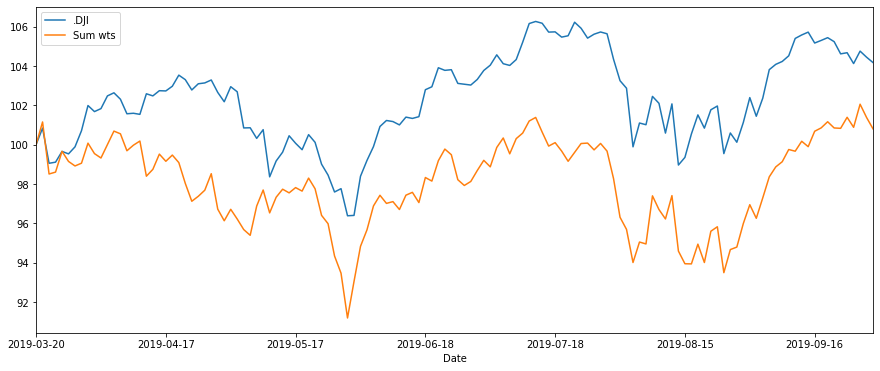

In [23]:
(Portfolio2 / Portfolio2.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()
#Because I used regression analysis, this is biased downward. As you can see it tracks the movements well,
#but does not have higher returns than the DJI

In [24]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   .DJI   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     71.48
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           5.50e-27
Time:                        00:01:09   Log-Likelihood:                 499.89
No. Observations:                 129   AIC:                            -991.8
Df Residuals:                     125   BIC:                            -980.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.353      0.725      -0.001       0.001
CVX            0.1706      0.040      4.253      0.000       0.091       0.250
NKE            0.3358      0.031     10.871      0.000       0.275       0.397
VZ             0.1018      0.041      2.462      0.015       0.020       0.184
==============================================================================
Omnibus:                       19.143   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.125
Skew:                          -0.796   Prob(JB):                     2.12e-06
Kurtosis:                       4.526   Cond. No.                         98.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""